# 岭回归原理

岭回归，即**Ridge Regression**。岭回归在线性回归的基础上通过在损失函数中引入**L2正则化项**来实现回归建模。

## 岭回归数学表达式

岭回归的数学表达式与多元线性回归类似，岭回归模型的一般形式为：
$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p + \epsilon$$
其中：
- $y$是因变量（目标变量）。
- $x_1, x_2, \dots, x_p$是自变量（特征变量）。
- $\beta_0$是截距，表示当所有自变量均为零时$y$的取值。
- $\beta_1, \beta_2, \dots, \beta_p$是回归系数，表示每个自变量对因变量的线性影响。
- $\epsilon$是误差项，表示模型未解释的部分。

## 岭回归目标函数

岭回归的目标是最小化**残差平方和**与**模型系数平方和**的加权和，其数学公式如下：
$$\min_{\beta} \left( \frac{1}{2n} \sum_{i=1}^{n} (y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij})^2 \right) + \lambda \sum_{j=1}^{p} \beta_j^2$$

其中：
- $n$是样本数量。
- $p$是特征数量。
- $y_i$是第$i$个样本的目标值。
- $x_{ij}$是第$i$个样本的第$j$个特征的值。
- $\beta_0$是截距项。
- $\beta_j$是第$j$个特征的系数。
- $\lambda$是正则化参数，控制模型复杂度和拟合度之间的权衡。

L2正则化项$\lambda \sum_{j=1}^{p} \beta_j^2$是岭回归的核心，其核心思想是计算模型系数的平方和，来实现对模型参数规模的惩罚。模型参数越多，模型回归系数越大，则L2正则化惩罚越大。

## 岭回归为什么能缓解多重共线性

### 多重共线性定义

**多重共线性**是指在回归模型中，多个自变量（特征变量）之间存在较强的线性相关性。这种相关性会导致模型系数估计的不稳定性，标准误差增大，从而使得模型的预测能力和解释能力下降

比如房价预测项目中，房屋面积和卧室数量这两个变量通常高度相关。银行卡违约风险人群识别项目中，收入与教育水平，这两个变量可能存在一定的线性相关性

### 岭回归如何缓解多重共线性

1. **收缩系数：** 当自变量之间存在多重共线性时，标准线性回归的系数可能会变得非常大，甚至符号交替，导致模型不稳定。岭回归中的L2正则化可以收缩这些系数，减少了它们的大小，从而提高了模型的稳定性。

2. **减少方差：** 岭回归通过引入偏差（通过收缩系数），减少了模型的方差。在处理多重共线性数据时，这种权衡是有益的，因为它减少了过拟合的风险，并提高了模型的泛化能力。

3. **数值稳定性：** 普通线性回归的系数估计公式为$\beta = (X^T X)^{-1} X^T$，当自变量高度相关时，矩阵$X^TX$可能接近奇异（不可逆），或者其特征值接近 0（多重共线性的典型特征），会导致数值不稳定（系数方差极大）。岭回归通过在$X^TX$的对角线上添加一个小的$\lambda I$（其中$I$是单位矩阵），有效地使其非奇异，从而解决了数值问题。

4. **平滑估计：** 通过收缩系数，岭回归提供了更平滑的估计，这些估计对数据中的噪声和多重共线性的影响不那么敏感。

## 岭回归的优缺点

### 岭回归的优点

- **缓解多重共线性**：岭回归中的L2正则化能够限制回归系数的大小，使模型对多重共线性具有更强的鲁棒性
- **防止过拟合，提高模型泛化能力**：L2正则化有助于减少过拟合，使模型在未见数据上表现更佳。

### 岭回归的缺点

- **无法实现特征选择**：与Lasso回归中的L1正则化系数不同，岭回归中的L2正则化系数只会压缩模型中的回归系数，但是不会将回归系数压缩为0，因此无法直接剔除无关特征
- **解释性较差**：岭回归中的L2正则化系数会压缩模型中的回归系数，导致模型的直观解释性下降

# 岭回归案例

## Ridge：
  - **alpha**：L2正则化系数，控制正则化强度
  - **random_state**：随机数种子

## 案例展示与代码实现

**make_regression**: 用于生成模拟回归数据集
  - **n_samples**: 生成的样本数量
  - **n_features**: 生成的特征数量
  - **noise**: 添加到目标变量中的噪声的标准差，noise越大则回归问题更难
  - **random_state**: 随机数种子

=== Ridge Regression ===
Ridge: y = 17.67 + 29.06*X1 + 28.72*X2 + 24.51*X3 + 25.70*X4 + 43.17*X5
RMSE: 120.87, R²: 0.28

=== Linear Regression ===
Linear: y = 17.71 + 40.54*X1 + 17.27*X2 + -144.06*X3 + 194.79*X4 + 43.84*X5
RMSE: 120.38, R²: 0.29



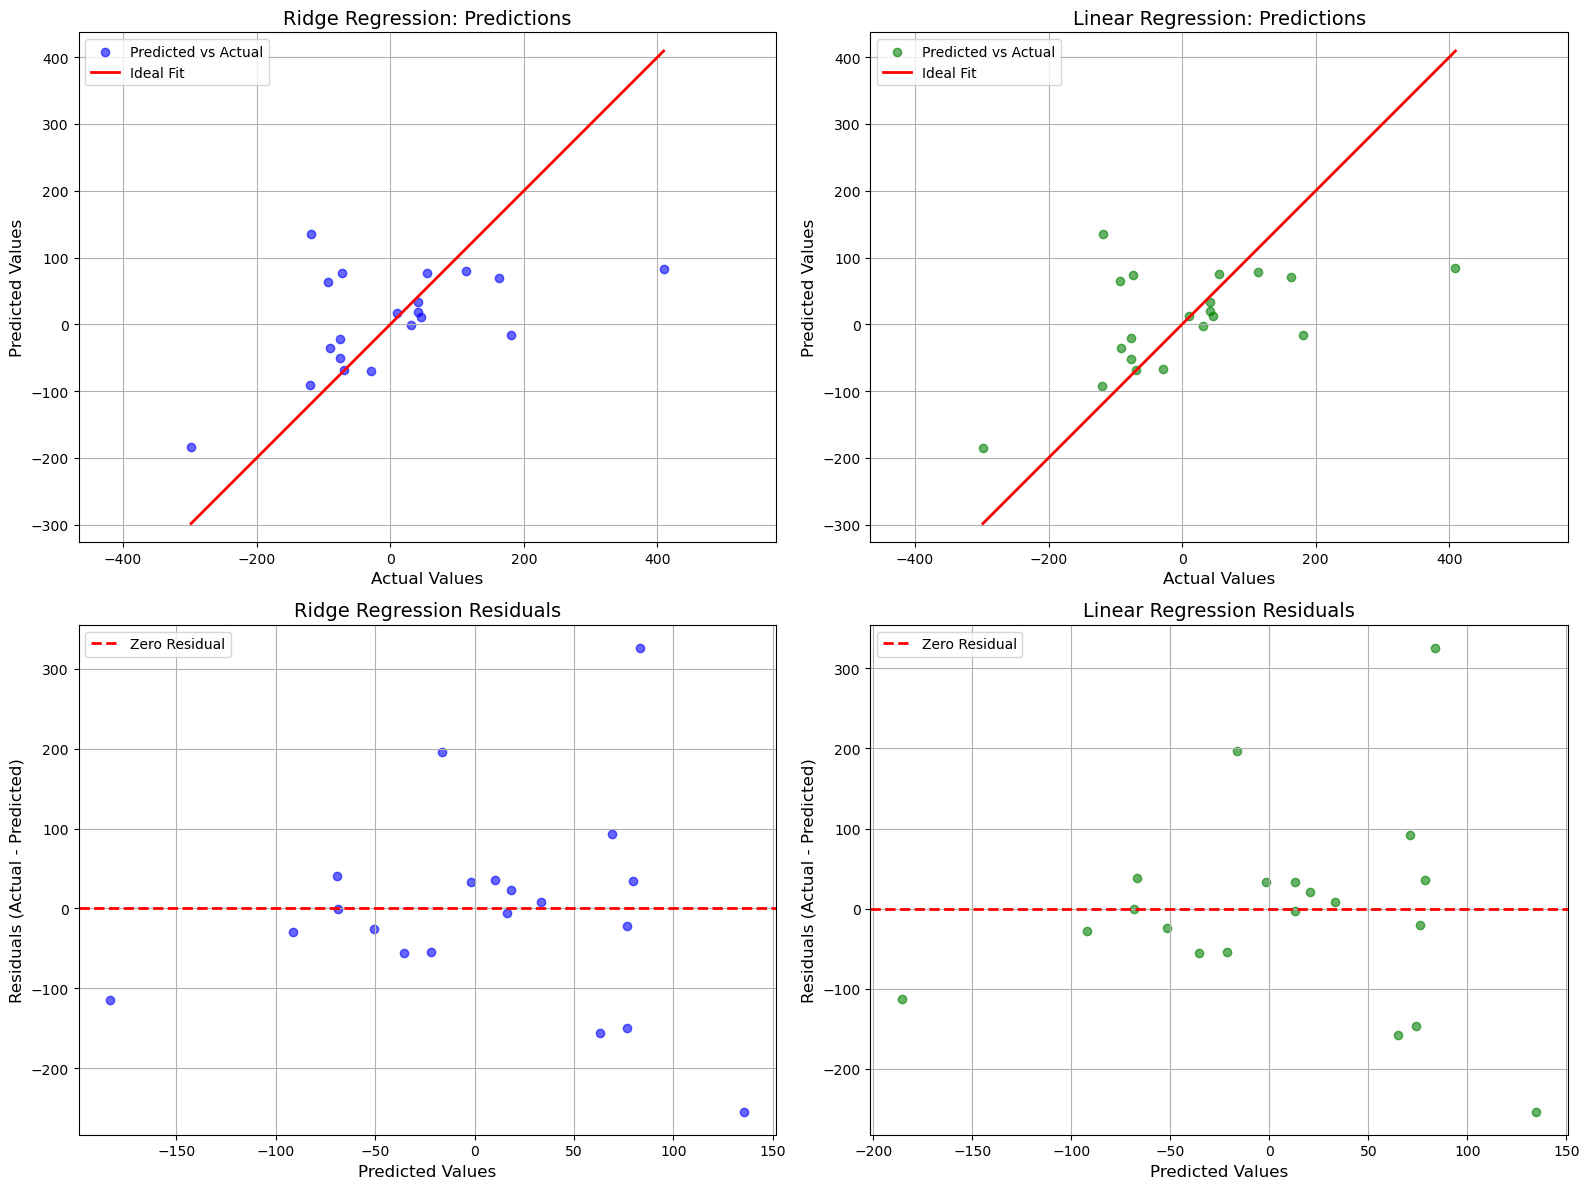

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression

# 生成模拟数据：具有多重共线性的特征
np.random.seed(42)  # 固定随机种子保证可重复性
n_samples, n_features = 100, 5  # 设定样本数和特征数
X, y = make_regression(n_samples=n_samples, n_features=n_features, noise=10, random_state=42)

# 人为引入多重共线性
X[:, 1] = X[:, 0] + np.random.randn(n_samples) * 0.01  # 第2列与第1列高度相关
X[:, 3] = X[:, 2] + np.random.randn(n_samples) * 0.01  # 第4列与第3列高度相关

# 将数据集划分为训练集和验证集，验证集占20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建并训练岭回归模型（L2正则化）
ridge_model = Ridge(alpha=1.0)  # alpha控制正则化强度，越大越强
ridge_model.fit(X_train, y_train)  # 用训练数据训练模型

# 创建并训练普通线性回归模型
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)  # 用训练数据训练模型

# 用训练好的模型进行预测
y_pred_ridge = ridge_model.predict(X_test)  # 岭回归的预测结果
y_pred_linear = linear_model.predict(X_test)  # 普通线性回归的预测结果

# 计算模型的性能指标
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))  # 均方根误差（RMSE）
r2_ridge = r2_score(y_test, y_pred_ridge)  # 决定系数R²
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))  # 普通线性回归的RMSE
r2_linear = r2_score(y_test, y_pred_linear)  # 普通线性回归的R²

# 获取回归公式
def get_formula(model, model_name):
    """返回回归模型的公式"""
    coefficients = model.coef_  # 回归系数
    intercept = model.intercept_  # 截距
    formula = f"{model_name}: y = {intercept:.2f} + " + " + ".join(
        [f"{coefficients[i]:.2f}*X{i+1}" for i in range(len(coefficients))]
    )
    return formula

# 打印回归公式和模型评估结果
print("=== Ridge Regression ===")
print(get_formula(ridge_model, "Ridge"))
print(f"RMSE: {rmse_ridge:.2f}, R²: {r2_ridge:.2f}\n")

print("=== Linear Regression ===")
print(get_formula(linear_model, "Linear"))
print(f"RMSE: {rmse_linear:.2f}, R²: {r2_linear:.2f}\n")

# 计算残差（真实值 - 预测值）
residuals_ridge = y_test - y_pred_ridge  # 岭回归的残差
residuals_linear = y_test - y_pred_linear  # 普通线性回归的残差

# 可视化：4个子图布局（2行2列）
plt.figure(figsize=(16, 12))  # 调整画布大小

# --- 岭回归预测图 ---
plt.subplot(2, 2, 1)  # 设定位置为2行2列的第1个子图
plt.scatter(y_test, y_pred_ridge, alpha=0.6, color="blue", label="Predicted vs Actual")  # 绘制实际值与预测值的散点图
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color="red", linewidth=2, label="Ideal Fit")  # 绘制理想拟合线（红色）
plt.title("Ridge Regression: Predictions", fontsize=14)  # 标题
plt.xlabel("Actual Values", fontsize=12)  # x轴标签
plt.ylabel("Predicted Values", fontsize=12)  # y轴标签
plt.legend()  # 显示图例
plt.grid(True)  # 显示网格
plt.axis('equal')  # 坐标轴等比例

# --- 线性回归预测图 ---
plt.subplot(2, 2, 2)  # 设定位置为2行2列的第2个子图
plt.scatter(y_test, y_pred_linear, alpha=0.6, color="green", label="Predicted vs Actual")  # 绘制实际值与预测值的散点图
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color="red", linewidth=2, label="Ideal Fit")  # 绘制理想拟合线（红色）
plt.title("Linear Regression: Predictions", fontsize=14)  # 标题
plt.xlabel("Actual Values", fontsize=12)  # x轴标签
plt.ylabel("Predicted Values", fontsize=12)  # y轴标签
plt.legend()  # 显示图例
plt.grid(True)  # 显示网格
plt.axis('equal')  # 坐标轴等比例

# --- 岭回归残差图 ---
plt.subplot(2, 2, 3)  # 设定位置为2行2列的第3个子图
plt.scatter(y_pred_ridge, residuals_ridge, alpha=0.6, color="blue")  # 绘制预测值与残差的散点图
plt.axhline(y=0, color="red", linestyle="--", linewidth=2, label="Zero Residual")  # 绘制残差为零的参考线（红色虚线）
plt.title("Ridge Regression Residuals", fontsize=14)  # 标题
plt.xlabel("Predicted Values", fontsize=12)  # x轴标签
plt.ylabel("Residuals (Actual - Predicted)", fontsize=12)  # y轴标签
plt.legend()  # 显示图例
plt.grid(True)  # 显示网格

# --- 线性回归残差图 ---
plt.subplot(2, 2, 4)  # 设定位置为2行2列的第4个子图
plt.scatter(y_pred_linear, residuals_linear, alpha=0.6, color="green")  # 绘制预测值与残差的散点图
plt.axhline(y=0, color="red", linestyle="--", linewidth=2, label="Zero Residual")  # 绘制残差为零的参考线（红色虚线）
plt.title("Linear Regression Residuals", fontsize=14)  # 标题
plt.xlabel("Predicted Values", fontsize=12)  # x轴标签
plt.ylabel("Residuals (Actual - Predicted)", fontsize=12)  # y轴标签
plt.legend()  # 显示图例
plt.grid(True)  # 显示网格

plt.tight_layout()  # 自动调整子图之间的间距
plt.show()  # 显示图形


## 结果分析

- **岭回归公式**
$$y = 17.67 + 29.06 * X1 + 28.72 * X2 + 24.51 * X3 + 25.70 * X4 + 43.17 * X5$$
    - RMSE (均方根误差): 120.87
    - R² (决定系数): 0.28  
- **线性回归公式**
$$y = 17.71 + 40.54 * X1 + 17.27 * X2 - 144.06 * X3 + 194.79 * X4 + 43.84 * X5$$
    - RMSE (均方根误差): 120.38
    - R² (决定系数): 0.29  

- **比较**
    - **系数的稳定性**
        - 岭回归：
            - 回归系数较为平滑且接近真实情况，特征间的共线性被有效缓解。
            - 例如 ( X3 ) 和 ( X4 ) 的系数没有出现过大的值。
        - 线性回归：
            - 回归系数波动较大，例如 ( X3 ) 的系数为 -144.06，( X4 ) 的系数为 194.79，表明特征间的多重共线性使模型变得不稳定。
    - **预测性能**
        - 均方根误差 (RMSE)：
            - 岭回归 (120.87) 和线性回归 (120.38) 的误差非常接近。
        - 决定系数 (R²)：
            - 两者的 ( R² ) 值几乎相同（岭回归为 0.28，线性回归为 0.29），但岭回归的系数更加稳健，更适合泛化到新数据。
    - **岭回归的优势**
        - 系数平滑：
            - 岭回归通过L2正则化抑制了特征之间的相关性对系数的影响，使得模型更加稳健。
        - 适合高相关特征：
            - 在存在多重共线性的情况下，岭回归比普通线性回归更可靠。